# Scikit-Learn Classification

- Pandas Documentation: http://pandas.pydata.org/
- Scikit Learn Documentation: http://scikit-learn.org/stable/documentation.html
- Seaborn Documentation: http://seaborn.pydata.org/


In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Read data from Files

In [23]:
df = pd.read_csv('../data/geoloc_elev.csv')

## 2. Quick Look at the data

In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
lat       1500 non-null float64
lon       1500 non-null float64
elev      1500 non-null float64
source    1500 non-null object
target    1500 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 58.7+ KB


In [26]:
df.head()

,lat,lon,elev,source,target
0,0.106264,0.068264,0.542477,S,1
1,0.099569,0.132094,0.722289,C,1
2,-0.775751,-0.814161,0.214760,S,0
3,-0.159833,0.040773,0.478576,S,1
4,-0.096395,0.021420,0.270322,C,1


In [27]:
df.tail()

,lat,lon,elev,source,target
1495,1.371969,-0.051412,0.340901,C,0
1496,1.163256,-0.024625,0.001898,S,0
1497,1.347938,0.020778,0.608316,Q,0
1498,1.266060,-0.016751,1.674323,Q,0
1499,1.105951,-0.076857,0.018016,S,0


In [28]:
df.describe()

,lat,lon,elev,target
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.002624,-0.002507,0.789127,0.333333
std,0.690768,0.687576,0.610569,0.471562
min,-1.680394,-1.672896,0.000198,0.000000
25%,-0.441686,-0.430040,0.295820,0.000000
50%,0.004606,-0.003988,0.650020,0.000000
75%,0.416209,0.430700,1.130405,1.000000
max,1.668836,1.628833,3.253980,1.000000


In [29]:
df['source'].value_counts()

C    555
Q    476
S    469
Name: source, dtype: int64

In [30]:
df['target'].value_counts()

0    1000
1     500
Name: target, dtype: int64

## 3. Visual exploration

In [31]:
import seaborn as sns

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density. Either provide the bandwidth during initialization or use an alternative method.

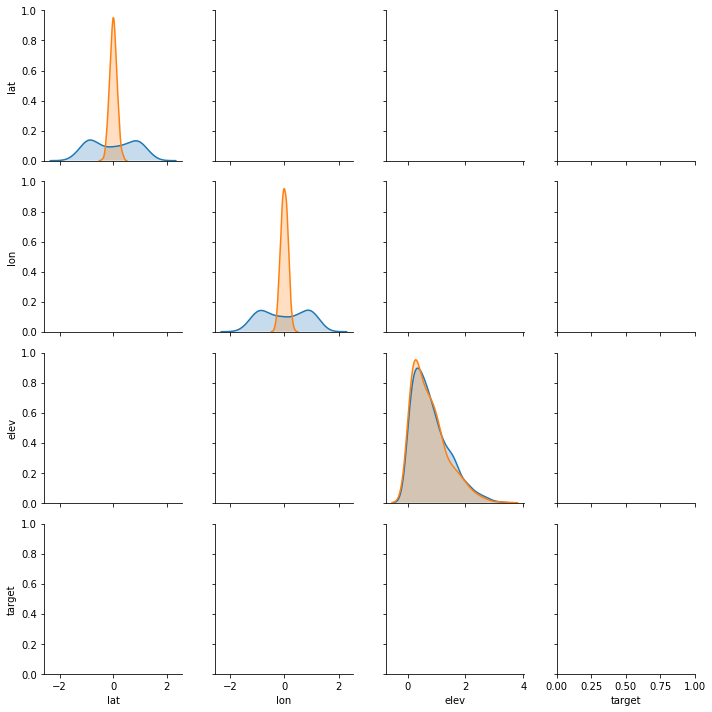

In [32]:
sns.pairplot(df, hue='target')

## 4. Define target

In [ ]:
y = df['target']
y.head()

## 5. Feature engineering

In [ ]:
raw_features = df.drop('target', axis='columns')
raw_features.head()

### 1-hot encoding

In [33]:
X = pd.get_dummies(raw_features)
X.head()

,lat,lon,elev,source_C,source_Q,source_S
0,0.106264,0.068264,0.542477,0,0,1
1,0.099569,0.132094,0.722289,1,0,0
2,-0.775751,-0.814161,0.214760,0,0,1
3,-0.159833,0.040773,0.478576,0,0,1
4,-0.096395,0.021420,0.270322,1,0,0


## 6. Train/Test split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=0)

## 7. Fit a Decision Tree model

In [35]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## 8. Accuracy score on benchmark, train and test sets

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,285,26
Hit,6,133


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       311
           1       0.84      0.96      0.89       139

    accuracy                           0.93       450
   macro avg       0.91      0.94      0.92       450
weighted avg       0.94      0.93      0.93       450



## 10. Feature Importances

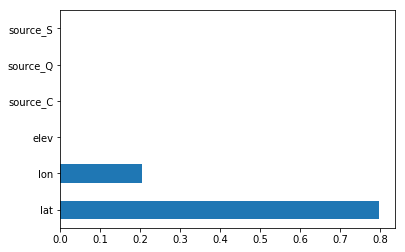

In [39]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh')

## 11. Display the decision boundary

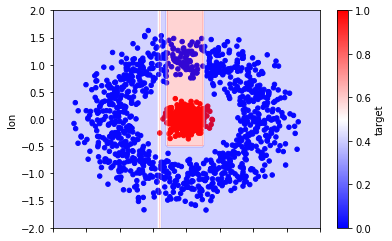

In [40]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
not_important = np.zeros((len(aa.ravel()), 4))
ab = np.c_[aa.ravel(), bb.ravel(), not_important]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

## Exercise 


Iterate and improve on the decision tree model. Now you have a basic pipeline example. How can you improve the score? Try some of the following:

1. change some of the initialization parameters of the decision tree re run the code.
    - Does the score change?
    - Does the decision boundary change?
2. try some other model like Logistic Regression, Random Forest, SVM, Naive Bayes or any other model you like from [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
3. what's the highest score you can get?